In [1]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
wine=load_wine()

In [3]:
X=wine.data[:,:2]
y=wine.target
print('Class label:',np.unique(y))

Class label: [0 1 2]


In [4]:
sc=StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(
X_std,y,test_size=0.3,random_state=1,stratify=y)

In [6]:
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [7]:
svmlin=SVC(kernel='linear',C=1.0,random_state=1)
svmlin.fit(X_train,y_train)
y_train_pred=svmlin.predict(X_train)
y_test_pred=svmlin.predict(X_test)

In [8]:
svmlin_train=accuracy_score(y_train,y_train_pred)
svmlin_test=accuracy_score(y_test,y_test_pred)
print('SVM with linear kernel train/test accuracies%.3f/%.3f'%(svmlin_train,svmlin_test))

SVM with linear kernel train/test accuracies0.806/0.741


In [9]:
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#Q
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=svmlin.predict(np.c_[xx.ravel(),yy.ravel()])


(-2.432983049556716, 3.9670169504432895)

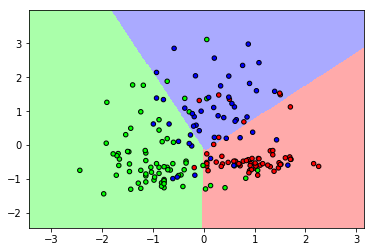

In [11]:
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X_std[:,0],X_std[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [12]:
#訓練高斯核函數
svmrbf=SVC(kernel='rbf',gamma=0.7,C=1.0)
svmrbf.fit(X_train,y_train)
y_train_pred=svmrbf.predict(X_train)
y_test_pred=svmrbf.predict(X_test)

In [13]:
svmrbf_train=accuracy_score(y_train,y_train_pred)
svmrbf_test=accuracy_score(y_test,y_test_pred)
print('SVM with RBM kernel train/test accuracies%.3f/%.3f'%(svmrbf_train,svmrbf_test))

SVM with RBM kernel train/test accuracies0.855/0.815


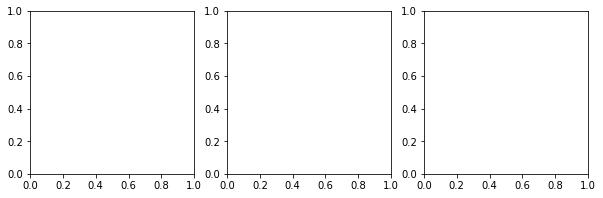

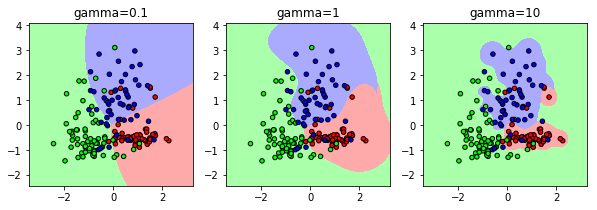

In [14]:
C=1.0
models=(SVC(kernel='rbf',gamma=0.1,C=C),
       SVC(kernel='rbf',gamma=1,C=C),
       SVC(kernel='rbf',gamma=10,C=C))
models=(clf.fit(X_train,y_train) for clf in models)

titles=plt.subplots(1,3,figsize=(10,3))

titles=('gamma=0.1','gamma=1','gamma=10')

fig,sub = plt.subplots(1,3,figsize = (10,3))
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

x_min,x_max=X_std[:,0].min() -1,X_std[:,0].max()+1
y_min,y_max=X_std[:,1].min() -1,X_std[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max, .02),
                    np.arange(y_min,y_max,.02))

for clf,title,ax in zip(models,titles,sub.flatten()):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    ax.pcolormesh(xx,yy,Z,cmap=cmap_light)
    ax.scatter(X_std[:,0],X_std[:,1],c=y,cmap=cmap_bold,
              edgecolor='k',s=20)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_title(title)
plt.show()